# Assignment #01

This assignment is composed of 4 tasks that your teams is supposed to propose a solution to these tasks that uses  the max-tree. The deliverable for this assignment is:

1. This jupyter-notebook completed with your solution. 
    - Create a GitHub repository and create a folder assignment-01. Put the jupyter-notebook with your solution in this repository and send the instructor the link. The same repository that your team created will be used for submitting the other assignments and your team final project.

You are being assessed based on:

1. Code execution - 20% 
2. Clarity of the code (e.g., easy to follow, has pertinent comments, etc.) - 20%
3. Proper usage of the techniques seen in class - 40% 
4. Quality of the results - 20%

More details about the assessment are available in the rubric document in the class GitHub repository.

In [ ]:
! git clone https://github.com/rmsouza01/ENSF619.2.git
! git clone https://github.com/rmsouza01/siamxt.git; cd siamxt; python setup.py install

import numpy as np # numpy is the major library in which siamxt was built upon
                   # we like the array programming style =)

# We are using PIL to read images     
from PIL import Image

# and matplotlib to display images
import matplotlib.pyplot as plt

# import maxtree
import siamxt

fatal: destination path 'ENSF619.2' already exists and is not an empty directory.
fatal: destination path 'siamxt' already exists and is not an empty directory.
running install
running build
running build_py
running build_ext
running install_lib
running install_egg_info
Removing /usr/local/lib/python3.7/dist-packages/siamxt-1.0.0.egg-info
Writing /usr/local/lib/python3.7/dist-packages/siamxt-1.0.0.egg-info


In [ ]:
#Utility fintion to show the original image and filtered image
def show_images(original_image, final_image):
  #Displaying the original image
  fig = plt.figure(dpi = 120)
  plt.subplot(121)
  plt.title("Original Image")
  plt.imshow(original_image, cmap='gray')
  plt.axis('off')
  
  #Displaying the filtered image
  plt.subplot(122)
  plt.imshow(final_image, cmap='gray')
  plt.axis('off')
  plt.title("Final Image")
  plt.show()

**Part 1)** Using the max tree area signature analysis, determined CCs in the max tree
that separate Mona Lisa’s face from the background

Image dimensions: 317x213 pixels


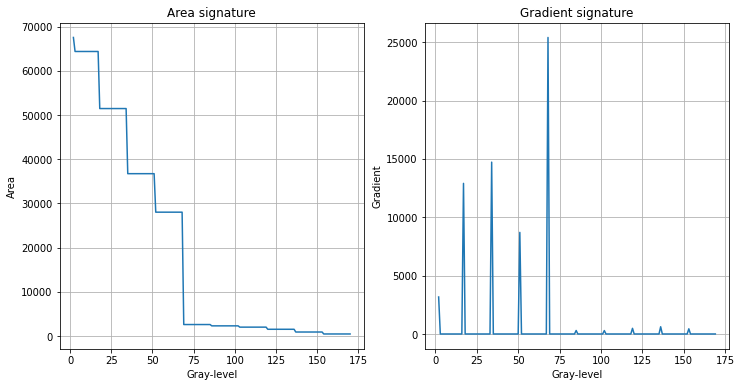

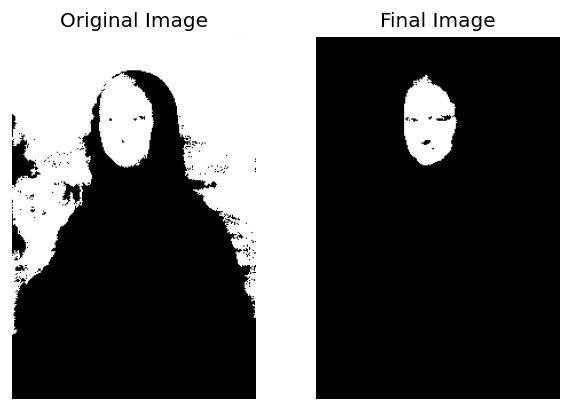

In [ ]:
# Loading the image.
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/monalisa.png").convert("L"))
print("Image dimensions: %dx%d pixels" %img.shape)

#Building connectivty
Bc = np.zeros((3,3), dtype = bool)
Bc[1,:] = True
Bc[:,1] = True

# Building the max-tree
mxt = siamxt.MaxTreeAlpha(img,Bc)

# Hand-picked regional maxima
x,y = 47,97

# Node corresponding to a regional maximum
node = mxt.node_index[x,y]

# Extracting area attribute from NA
area = mxt.node_array[3,:]

# Area signature computation
levels,signature =  mxt.getSignature(area, node)

#Gradient of the area signature
gradient = signature[0:-1] - signature[1:]

# Display area signature
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.plot(levels,signature)
plt.grid()
plt.xlabel("Gray-level")
plt.ylabel("Area")
plt.title("Area signature")

# Display gradient of the area signature
plt.subplot(122)
plt.grid()
plt.plot(levels[0:-1],gradient)
plt.xlabel("Gray-level")
plt.ylabel("Gradient")
plt.title("Gradient signature")

# Selecting the second peak of the gradient
index = np.argsort(gradient)[::-1][0]

#reconstructing the node corresponding to the peak (largest area)
area1 = signature[index]
node1 = np.where(mxt.node_array[3,:] == area1)[0][0]
cc1 = mxt.recConnectedComponent(node1)

#reconstructing the node corresponding to the peak (smaller area)
area2 = signature[index + 1]
node2 = np.where(mxt.node_array[3,:] == area2)[0][0]
cc2 = mxt.recConnectedComponent(node2)

#Show images
show_images(cc1, cc2)


**Part 2)** Apply a series of filters to this image to segment the carotid arteries wall

Image dimensions: 322x322 pixels


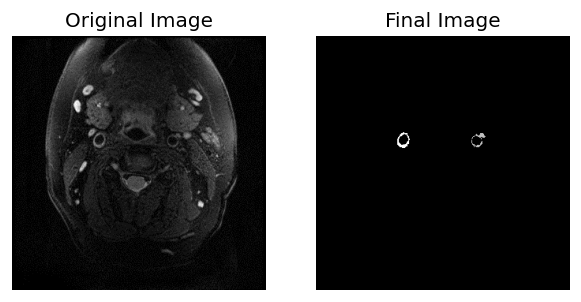

In [ ]:
# Loading the image.
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/carotid.png").convert("L"))
print("Image dimensions: %dx%d pixels" %img.shape)

#Building connectivty
Bc = np.ones((3,3), dtype = bool)

# Filter parameters
min_w = 12.85  # Minimum bounding-box width
min_h = 6.95 # Minimum bounding-box height
max_w = 21 # Maximum bounding-box width
max_h = 21 # Maximum bounding-box height
min_rr = 0.3 # Minimum rectangularity ratio
max_rr = 0.4 # Maximum rectangularity ratio
max_x = 150 # maximum x-coordinate
min_x = 100 # minimum x-coordinate

# Building the max-tree of the negated image, i.e. min-tree
mxt = siamxt.MaxTreeAlpha(img,Bc)

# Bounding box-lengths
x=mxt.node_array[6,:]
dx = mxt.node_array[7,:] - mxt.node_array[6,:]
dy = mxt.node_array[10,:] - mxt.node_array[9,:]

# Rectangularity ratio
rr = mxt.computeRR()

# Node selection criteria
nodes = (dx>min_h) & (dx<max_h) & (dy > min_w) & (dy < max_w) & (rr > min_rr) & (rr<max_rr) & ( x > min_x) & (x < max_x)

#Filtering the max-tree
mxt.contractDR(nodes)

# Recovering the filtered the image
img_filtered = mxt.getImage()

#Show images
show_images(img, img_filtered)

**Parte 3)** Apply a series of filters to remove the white artifacts in the image

Image dimensions: 320x213 pixels


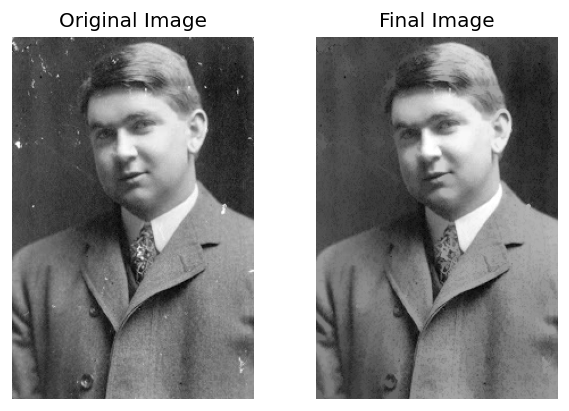

In [ ]:
# Loading the image.
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/filtering-image.jpg").convert("L"))
print("Image dimensions: %dx%d pixels" %img.shape)

#Structuring element with connectivity-8
Bc = np.ones((3,3),dtype = bool)

#Filter value
area = 55

#Building the max-tree of the image
mxt= siamxt.MaxTreeAlpha(img,Bc)

#Applying an area-open filter
mxt.areaOpen(area)

#Recovering the image 
img_filtered =  mxt.getImage()

#Show images
show_images(img, img_filtered)

**Part 4)** Apply a series of filters that will remove all objects in the image except for the
two pens

Image dimensions: 381x384 pixels


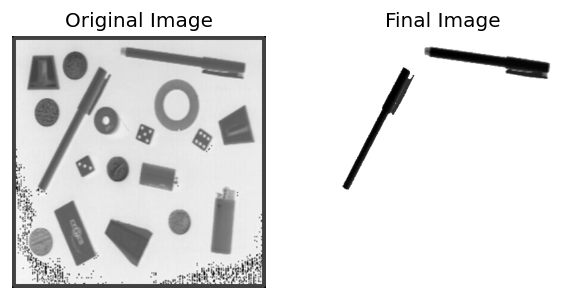

In [ ]:
# Loading the image.
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/objects.png").convert("L"))
print("Image dimensions: %dx%d pixels" %img.shape)

#Building connectivty
Bc = np.ones((3,3), dtype = bool)

# Filter parameters
min_w = 62  # Minimum bounding-box width
max_w = 190 # Maximum bounding-box width
max_h = 185 # Maximum bounding-box height
min_rr = 0.05 # Minimum rectangularity ratio
max_rr = 0.41 # Maximum rectangularity ratio

#Calculating the negated image
img_max = img.max()
img_neg = img_max-img

# Building the max-tree of the negated image, i.e. min-tree
mxt = siamxt.MaxTreeAlpha(img_neg,Bc)

# Bounding box-lengths
x=mxt.node_array[6,:]
dx = mxt.node_array[7,:] - mxt.node_array[6,:]
dy = mxt.node_array[10,:] - mxt.node_array[9,:]

# Rectangularity ratio
rr = mxt.computeRR()

# Node selection criteria
nodes = (dx<max_h) & (dy > min_w) & (dy < max_w) & (rr > min_rr) & (rr <max_rr)

#Filtering the max-tree
mxt.contractDR(nodes)

# Recovering the filtered the image
img_filtered = mxt.getImage()

#Calculating negated of filtered image
img_filtered_max = img_filtered.max()
img_filtered = img_filtered_max - img_filtered

#Show images
show_images(img, img_filtered)